In [1]:
import pandas as pd  # importamos módulo pandas
import numpy as np # importamos módulo numpy
import zipfile

In [2]:
#Se carga la base con las variables ya seleccionadas
Data = pd.read_csv('C:/Users/user/OneDrive - Universidad de Los Andes/DEEP LEARNING Y REDES NEU/PROYECTO/data/train2.csv') 
Data.head()
#Revisión de casos positivos y negativos
Data['target'].value_counts()

0    110728
1     33549
Name: target, dtype: int64

In [3]:
#ELIMINO LAS VARIABLES QUE ELIMINÉ EN EL TRATAMIENTO DE DATOS
Data.isnull().sum().sort_values(ascending=False)
y = Data['target']
X = Data.drop(['target','VAR_0073','VAR_0075','VAR_0156', 'VAR_0157', 'VAR_0200', 'VAR_0217', 'VAR_0158', 
               'VAR_0159', 'VAR_0166', 'VAR_0167', 'VAR_0168', 'VAR_0169', 'VAR_0176', 'VAR_0204', 
               'VAR_0177', 'VAR_0354', 'VAR_0178', 'VAR_0179', 'VAR_0404', 'VAR_0467', 'VAR_0493', 'VAR_0342',
               'VAR_0205', 'VAR_0206', 'VAR_0209', 'VAR_0208', 'VAR_0074', 'VAR_0212'], axis=1)
X.head()

,Unnamed: 0,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0015,...,VAR_1912,VAR_1913,VAR_1918,VAR_1921,VAR_1922,VAR_1926,VAR_1927,VAR_1929,VAR_1932,VAR_1934
0,0,2,H,224,0,4300,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,98,999999998,9998,IAPS
1,1,4,H,7,53,4448,B,1.0,0.0,1.0,...,6546,6546,9996,98,999999998,98,98,999999998,9998,IAPS
2,2,5,H,116,3,3464,C,0.0,0.0,0.0,...,999999997,999999997,9996,98,999999998,98,98,999999998,9998,IAPS
3,3,7,H,240,300,3200,C,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,98,999999998,9998,RCC
4,4,8,R,72,261,2000,N,0.0,0.0,0.0,...,999999998,999999998,9998,98,999999998,98,98,999999998,9998,BRANCH


In [4]:
#elimino categoricas
X2 = X.select_dtypes(exclude=['object']).copy()
X2.head()
X2.isnull().sum().sort_values(ascending=False)
X2.fillna(0, inplace=True)

#elimino variables con poca varianza
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X3=sel.fit_transform(X2)

In [9]:
cols=X2.columns
cols

Index(['Unnamed: 0', 'ID', 'VAR_0002', 'VAR_0003', 'VAR_0004', 'VAR_0006',
       'VAR_0007', 'VAR_0015', 'VAR_0016', 'VAR_0017',
       ...
       'VAR_1908', 'VAR_1912', 'VAR_1913', 'VAR_1918', 'VAR_1921', 'VAR_1922',
       'VAR_1926', 'VAR_1927', 'VAR_1929', 'VAR_1932'],
      dtype='object', length=665)

In [5]:
#Escalo los datos
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X3)
X3=scaler.transform(X3)

len(X3)

144277

In [6]:
from sklearn.svm import SVC
#entreno el modelo SVM
clf = SVC(C=1,kernel='rbf',probability=False)
clf.fit(X3,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
#cargo la base test
with zipfile.ZipFile('C:/Users/user/OneDrive - Universidad de Los Andes/DEEP LEARNING Y REDES NEU/PROYECTO/data/test.csv.zip', 'r') as z:
    f = z.open('test.csv')
    X_test = pd.io.parsers.read_table(f, index_col=False, sep=',')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
X_test.shape

(145232, 1933)

In [15]:
#Selecciono las mismas variables que tomé en la base de train
X_test= pd.DataFrame(X_test, columns=cols)
X_test.shape

(145232, 665)

In [17]:
#Tomamos la base de Test, la imputamos 
#transformamos la base test tal como se transformó la base train
X_test.isnull().sum().sort_values(ascending=False)
X_test.fillna(0, inplace=True)
X_test1=sel.transform(X_test)

In [18]:
#hago la prediccion
pred=clf.predict(X_test1)

In [19]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
import collections, numpy
collections.Counter(pred)

Counter({0: 145232})

In [34]:
#Cargo los indices
indices = pd.read_csv('C:/Users/user/OneDrive - Universidad de Los Andes/DEEP LEARNING Y REDES NEU/PROYECTO/data/ids.csv', sep=';') 
indices.ID

0              1
1              3
2              6
3              9
4             10
5             11
6             12
7             13
8             15
9             17
10            18
11            19
12            27
13            29
14            33
15            34
16            39
17            41
18            44
19            45
20            47
21            48
22            49
23            53
24            56
25            57
26            59
27            61
28            64
29            68
           ...  
145202    290400
145203    290401
145204    290403
145205    290406
145206    290408
145207    290410
145208    290411
145209    290413
145210    290416
145211    290418
145212    290419
145213    290420
145214    290421
145215    290422
145216    290423
145217    290425
145218    290428
145219    290430
145220    290433
145221    290435
145222    290437
145223    290438
145224    290442
145225    290444
145226    290446
145227    290451
145228    290455
145229    2904

In [35]:
#Guardo el archivo para cargue en KAGGLE
predload = pd.DataFrame(index=indices.ID,columns=['target'],data=pred)
predload.to_csv('C:/Users/user/OneDrive - Universidad de Los Andes/DEEP LEARNING Y REDES NEU/PROYECTO/data/pred1.csv',index_label='ID',float_format='%1.3f')

# RESULTADO DEL CARGUE EN KAGGLE

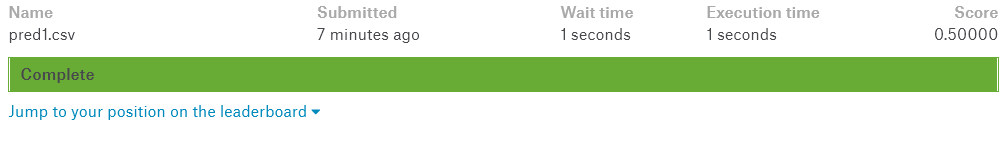

In [49]:
from IPython.display import Image
Image("reskaggle2.png")